[View in Colaboratory](https://colab.research.google.com/github/iiwakuralain/TCC2/blob/master/MLP_regressor_multi_input.ipynb)

In [0]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [258]:
!pip install -q xlrd
!git clone https://github.com/iiwakuralain/TCC2

fatal: destination path 'TCC2' already exists and is not an empty directory.


In [259]:
cd TCC2

/content/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2


In [260]:
ls

db.csv     linear.ipynb                         NeuralNetwork_Simple_Test.ipynb
db_ok.csv  neural_MLPRegressor.ipynb            TCC2/
LICENSE    neural_MLPRegressor_one_input.ipynb


In [0]:
import pandas as pd
df = pd.read_csv('db_ok.csv')

In [0]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [0]:
joinville = df.loc[(df['cidade'] == 1)]

In [264]:
joinville.head()

,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
0,1,58.652928,18054.0,15045.00000,297.782896,256.508935
1,1,148.766748,45000.0,38160.00000,297.782896,256.508935
2,1,17.855129,5000.0,4580.00000,297.782896,256.508935
3,1,120.552592,35898.5,30922.81693,297.782896,256.508935
4,1,14.619374,4375.0,3750.00000,297.782896,256.508935


In [265]:
joinville.shape

(95, 6)

In [266]:
mydf = joinville.astype('int64')
print(mydf.info()) # Overview of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 6 columns):
cidade     95 non-null int64
m2Aprox    95 non-null int64
4mm        95 non-null int64
3mm        95 non-null int64
$4mm       95 non-null int64
$3mm       95 non-null int64
dtypes: int64(6)
memory usage: 5.2 KB
None


In [267]:
df_joinville = mydf.drop(['3mm'], axis=1)
y = mydf['3mm']

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_joinville, y, test_size=0.30)
print(X_train.shape, y_train.shape)

((66, 5), (66,))


In [0]:
from sklearn.neural_network import MLPRegressor

In [0]:
clf = MLPRegressor(solver='lbfgs',
                    hidden_layer_sizes=(10,), random_state=1)

In [270]:
clf.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [0]:
predictions = clf.predict(X_test)

In [272]:
buildCompareT = {'m2Aprox': X_test['m2Aprox'], 'yTest': y_test, 'yPredicted':predictions.astype('int64')}
compareT = pd.DataFrame(data=buildCompareT)
compareT

,m2Aprox,yPredicted,yTest
66,220,55168,56431
69,112,28494,28125
31,10,2938,2689
47,55,14340,14300
5,141,36218,36366
91,1790,455604,501000
58,36,9546,7897
28,179,45865,46101
35,154,40672,39606
92,624,159068,160061


Text(0,0.5,u'Predictions')

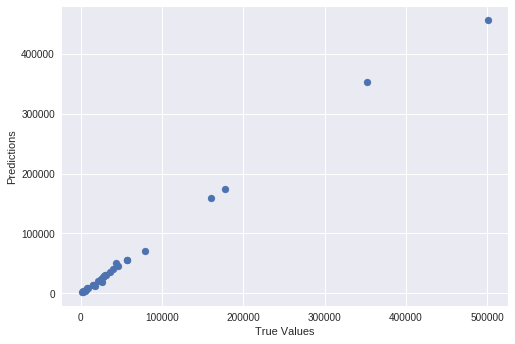

In [273]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [274]:
r2_score(y_test, predictions)

0.9934222592289383

In [275]:
mean_squared_error(y_test, predictions)

77849125.2643554

In [276]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

2881.7884953106386

In [277]:
"""
Regression metrics
See the Regression metrics section of the user guide for further details.

metrics.explained_variance_score(y_true, y_pred)	Explained variance regression score function
metrics.mean_absolute_error(y_true, y_pred)	Mean absolute error regression loss
metrics.mean_squared_error(y_true, y_pred[, …])	Mean squared error regression loss
metrics.mean_squared_log_error(y_true, y_pred)	Mean squared logarithmic error regression loss
metrics.median_absolute_error(y_true, y_pred)	Median absolute error regression loss
metrics.r2_score(y_true, y_pred[, …])	R^2 (coefficient of determination) regression score function.
"""
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

print 'explained_variance_score: '
explained_variance_score(y_test, predictions)


explained_variance_score: 


0.9937523650615158

In [278]:

print 'mean_absolute_error: '
mean_absolute_error(y_test, predictions)



mean_absolute_error: 


2881.7884953106386

In [279]:

print 'mean_squared_error: '
mean_squared_error(y_test, predictions)



mean_squared_error: 


77849125.2643554

In [280]:
print 'median_absolute_error: '
median_absolute_error(y_test, predictions)



median_absolute_error: 


280.4049302762396

In [281]:
print 'r2_score: '
r2_score(y_test, predictions)

r2_score: 


0.9934222592289383